###### Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping

In [69]:
#installing beautiful soup
#!pip install bs4

In [70]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [100]:
URL = "https://www.amazon.com/s?k=apple+ipad&crid=1HALQK1HN99XF&sprefix=apple+%2Caps%2C329&ref=nb_sb_ss_ts-doa-p_3_6"

In [101]:
#define http header

HEADERS =  ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:107.0) Gecko/20100101 Firefox/107.0', 'Accept-Language': 'en-US, en;q=0.5'})


In [102]:
#http request
webpage = requests.get(URL, headers=HEADERS)

In [103]:
webpage

<Response [200]>

In [104]:
#to see entire content
webpage.content

b'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function()

In [105]:
type(webpage.content)

bytes

In [106]:
#to convert bytes to html format we are using beautiful soup
soup = BeautifulSoup(webpage.content,'html.parser')

In [107]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [108]:
#fetch links as list of tag objects
links = soup.find_all("a",attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [109]:
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/2021-Apple-10-2-inch-iPad-Wi-Fi/dp/B09G9CJM1Z/ref=sr_1_1?crid=1HALQK1HN99XF&amp;keywords=apple+ipad&amp;qid=1669643408&amp;sprefix=apple+%2Caps%2C329&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">2021 Apple 10.2-inch iPad (Wi-Fi, 64GB) - Silver</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Apple-iPad-10-2-Inch-Wi-Fi-128GB/dp/B07XR5B32Q/ref=sr_1_2?crid=1HALQK1HN99XF&amp;keywords=apple+ipad&amp;qid=1669643408&amp;sprefix=apple+%2Caps%2C329&amp;sr=8-2"><span class="a-size-medium a-color-base a-text-normal">2019 Apple iPad (10.2-inch, Wi-Fi, 128GB) - Silver (7th Generation)</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Apple-iPad-10-2-Inch-Wi-Fi-32GB/dp/B07XL7G4H6/ref=sr_1_3?crid=1HALQK1HN99XF&amp;keywords=apple+ipad&amp;qid=1669643408&amp;sp

In [110]:
links[0]

<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/2021-Apple-10-2-inch-iPad-Wi-Fi/dp/B09G9CJM1Z/ref=sr_1_1?crid=1HALQK1HN99XF&amp;keywords=apple+ipad&amp;qid=1669643408&amp;sprefix=apple+%2Caps%2C329&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">2021 Apple 10.2-inch iPad (Wi-Fi, 64GB) - Silver</span> </a>

In [111]:
link=links[0].get('href')

In [112]:
product_list = "https://amazon.com"+link

In [113]:
product_list

'https://amazon.com/2021-Apple-10-2-inch-iPad-Wi-Fi/dp/B09G9CJM1Z/ref=sr_1_1?crid=1HALQK1HN99XF&keywords=apple+ipad&qid=1669643408&sprefix=apple+%2Caps%2C329&sr=8-1'

In [114]:
new_webpage = requests.get(product_list,headers=HEADERS)

In [115]:
new_webpage

<Response [200]>

In [116]:
new_soup = BeautifulSoup(new_webpage.content,'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
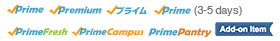

In [117]:
new_soup

In [118]:
new_soup.find("span",attrs={"id": 'productTitle'})

<span class="a-size-large product-title-word-break" id="productTitle">        2021 Apple 10.2-inch iPad (Wi-Fi, 64GB) - Silver       </span>

In [119]:
new_soup.find("span",attrs={"id": 'productTitle'}).text

'        2021 Apple 10.2-inch iPad (Wi-Fi, 64GB) - Silver       '

In [120]:
new_soup.find("span",attrs={"id": 'productTitle'}).text.strip()

'2021 Apple 10.2-inch iPad (Wi-Fi, 64GB) - Silver'

In [125]:
new_soup.find("span",attrs={"class":"a-price a-text-price a-size-medium apexPriceToPay"})